In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib.inline 
import seaborn as sns
import numpy as np
import sys #System-specific parameters and functions
import os #operating system dependent functionality

- Ever since I graduated from college, I knew I would attend graduate school to sharpen my data science skills. Applying for a master's degree is a very expensive process and is filled with intensive work. This kernel shows how well we can guess the capacities of students to decide whether to apply for a Master's degree or not.
- In this notebook I explore a number of different types of machine learning models, mostly to show my literacy and breadth of understanding of different models. I have attached the dataset in the email.

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()
# 9 different features
# tells me what was used to find the # of samples and the # of features
# no string or null data
# data types are int64 and float64
# memory usage: 28.2 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
print("There are", len(df.columns), "columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.tail()
plt.scatter(df["GRE Score"], df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


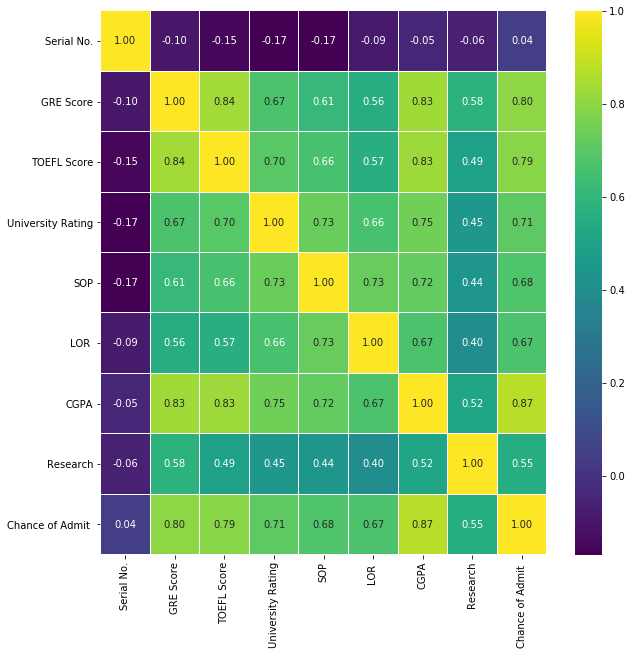

In [8]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05,
           fmt = '.2f', cmap = "viridis")
plt.show()
#notice that research exp. is particularly lowly correlated

I chose to implement a heatmap to see which features in this dataset are particularly correlated. In order to deduce whether or not certain features have strong relationships with one another, we look for values greater than .6, as that suggests a strong correlation between features. From evaluating this heatmap, I found that there following features are strongly correlated with one another:
- GRE Score + TOEFL Score
- University Rating + GRE Score
- GRE Score + CGPA
- GRE Score + Chance of Admit
- TOEFL Score + University Rating
- TOEFL Score + SOP (Statement of Purpose)
- TOEFL Score + CGPA
- TOEFL Score + Chance of Admit

While there are other strong relationships, this is a general understanding of how some variables shed insight onto other variables. Some questions may arise from this heatmap that pries into why these particular variables have such strong correlations with one another, and what this might suggest in a broader picture.

Not Having Research: 181
Having Research: 219


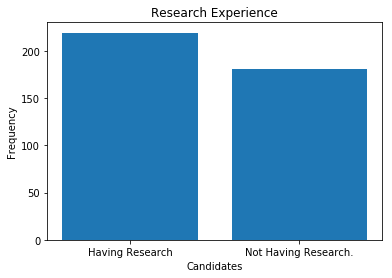

In [9]:
print("Not Having Research:", len(df[df.Research == 0]))
print("Having Research:", len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]), len(df[df.Research == 1])])
x = ["Not Having Research.", "Having Research"]
plt.bar(x, y)
plt.title("Research Experience")
plt.xlabel("Candidates")
plt.ylabel("Frequency")
plt.show()

In the cell above, I analyzed the amount of candidates with research experience and otherwise. The heatmap suggests research is not particularly important, and I wanted to see who many individuals in particular boast this experience. 

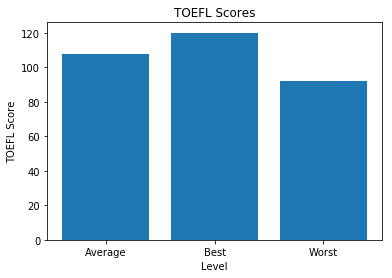

In [10]:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

In the cell below, I analyze GRE scores.

GRE Score:

• The histogram shows the freq. for GRE scores
• Histogram shows density b/w 310 and 330. Being above this range would be a good feature for a candidate to stand out.

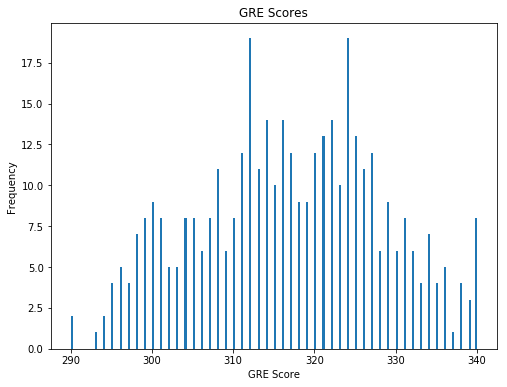

In [11]:
df["GRE Score"].plot(kind = 'hist', bins = 200, figsize = (8,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

CGPA Scores for University Ratings:

• As the quality of the university increases, the CGPA score increases.

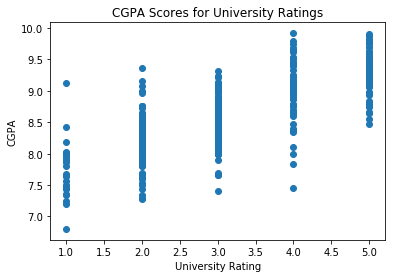

In [12]:
plt.scatter(df["University Rating"], df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

• Candidates with high GRE scores usually have a high CGPA score also.

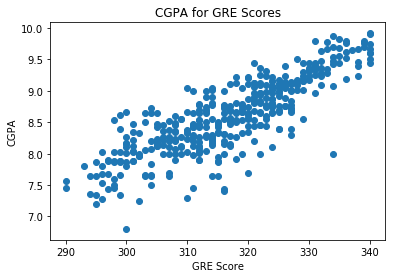

In [13]:
plt.scatter(df["GRE Score"], df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

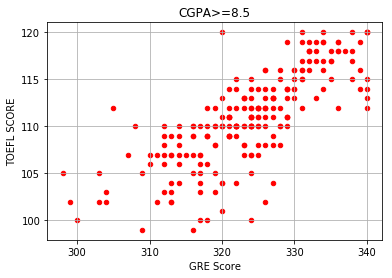

In [14]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', 
                        y='TOEFL Score', color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

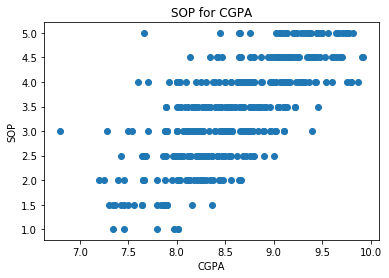

In [16]:
plt.scatter(df["CGPA"], df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

• Candidates with high GRE scores usually have a high SOP (statement of purpose) score.

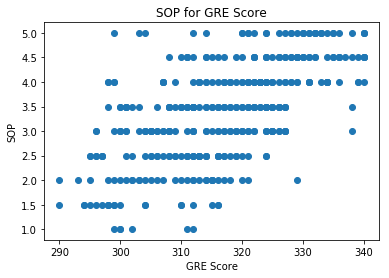

In [17]:
plt.scatter(df["GRE Score"], df["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

## Regression Algorithms (Supervised Machine Learning Algorithms) 
## Prepping the data for regression
## Serial No. is deleted because it stores index values. In the future this column does not benefit for regression algorithms

In [19]:
# reading the dataset
df = pd.read_csv("Admission_Predict.csv", sep = ",")

# it may be needed in the future
serialNo = df["Serial No."].values

df.drop(["Serial No."], axis = 1, inplace = True)

df = df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

train_test_split:

• It splits the data into random train (80%) and test (20%) subsets.

In [20]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"], axis=1)

# separating train (80%) and test (20%) sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, 
                                                    random_state = 42)

Normalization (min-max scaling):

• It makes values scaled to a fixed range (0-1). 

In [23]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

C:\Users\andre\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\andre\Anaconda4\lib\site-packages\pandas\core\frame.py:2356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\andre\Anaconda4\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

Now about r2_score:
• It is the regression score function.
• The best possible score is 1.0 for r2_score.
• It may be negative.

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0.68 -> the predict: [ 40.55287811]
real value of y_test[2]: 0.9 -> the predict: [ 44.57173808]
r_square score:  -64336.2496677
r_square score (train dataset):  0.795194600319


## Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

r_square score:  -2.01937519022
real value of y_test[1]: 0.68 -> the predict: [ 0.9666]
real value of y_test[2]: 0.9 -> the predict: [ 0.9666]
r_square score (train dataset):  0.963551816881


## Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))


r_square score:  -1.58646634739
real value of y_test[1]: 0.68 -> the predict: [ 0.97]
real value of y_test[2]: 0.9 -> the predict: [ 0.97]
r_square score (train dataset):  1.0


## Comparison of Regression Algorithms
• Linear regression and random forest regression algorithms were better than decision tee regression algorithm. 

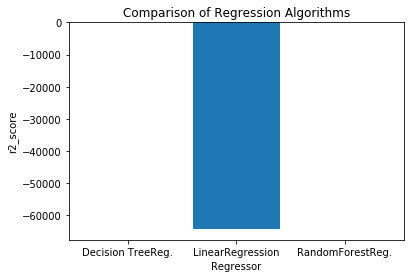

In [32]:
y = np.array([r2_score(y_test, y_head_lr), r2_score(y_test, y_head_rfr),
             r2_score(y_test, y_head_dtr)])
x = ["LinearRegression", "RandomForestReg.", "Decision TreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

• These are the regression estimates for samples with 5 and 50 indexes:

In [33]:
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(lr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[5],:])))

print()

print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(lr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[50],:])))

real value of y_test[5]: 0.94 -> the predict: [ 44.62529115]
real value of y_test[5]: 0.94 -> the predict: [ 0.9666]
real value of y_test[5]: 0.94 -> the predict: [ 0.97]

real value of y_test[50]: 0.86 -> the predict: [ 43.50310842]
real value of y_test[50]: 0.86 -> the predict: [ 0.9666]
real value of y_test[50]: 0.86 -> the predict: [ 0.97]


This is the estimate and the actual acceptance possibilities made with 3 regression algorithms for test samples with 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75 indexes:

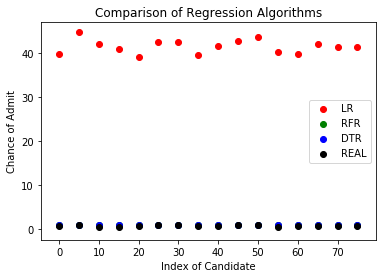

In [34]:
red = plt.scatter(np.arange(0,80,5),y_head_lr[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

Comment:

Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted.

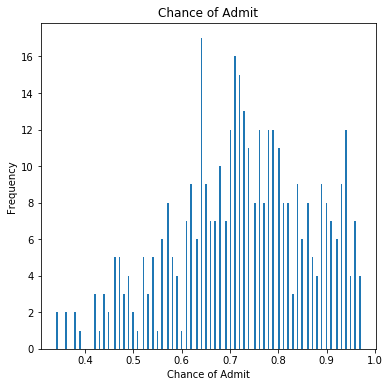

In [35]:
df["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

## Classification Algorithms (Supervised Machine Learning Algorithms)

### Preparing Data for Classification

##### • If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
##### • If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

In [38]:
# reading the dataset
df = pd.read_csv("Admission_Predict.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

C:\Users\andre\Anaconda4\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\andre\Anaconda4\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\andre\Anaconda4\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

#### Note about score:

• It is the mean accuracy for test data and labels.

• TP = True Positive

• TN = True Negative

• FP = False Positive

• FN = False Negative

#### Note about precision:

• precision = TP / (TP + FP)

#### Note about recall:

• recall = TP / (TP + FN)
#### Note about F!:

• F1 = 2 / ((1/precision)+(1/recall))

### Logistic Regression

Confusion Matrix:

For Actual 1: 29

Predicted 1: 22
Predicted 0: 7
According to Confusion Matrix, the model predicted that 23 candidate's Chances of Admit are greater than 80%. In reality, 22 of them have a Chance of Admit greater than 80%. In total, 29 candidate's Chances of Admit are greater than 80%.
For Actual 0: 51

Predicted 1: 1
Predicted 0: 50
According to Confusion Matrix, the model predicted that 57 candidate's Chances of Admit are less than or equal to 80%. In reality, 50 of them have a Chance of Admit less than or equal to 80%. In total, 51 candidate's Chances of Admit are less than or equal to 80%.

score:  0.9
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


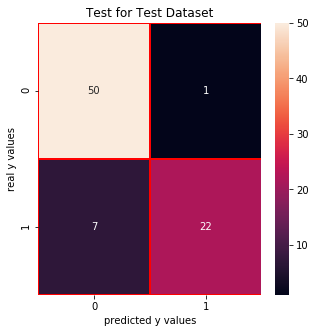

precision_score:  0.95652173913
recall_score:  0.758620689655
f1_score:  0.846153846154


In [39]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train,y_train_01)
print("score: ", lrc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01,lrc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,lrc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,lrc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,lrc.predict(x_test)))

Test for Train Dataset:

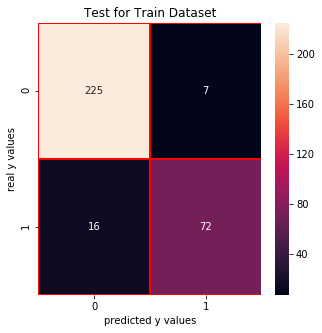

In [40]:
cm_lrc_train = confusion_matrix(y_train_01,lrc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### Support Vector Machine
Confusion Matrix:

For Actual 1: 29

Predicted 1: 22
Predicted 0: 7
For Actual 0: 51

Predicted 1: 1
Predicted 0: 50

score:  0.9
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


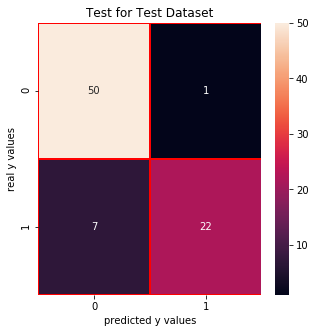

precision_score:  0.95652173913
recall_score:  0.758620689655
f1_score:  0.846153846154


In [41]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train_01)
print("score: ", svm.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(svm.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(svm.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,svm.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,svm.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,svm.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,svm.predict(x_test)))

Test for Train Dataset:

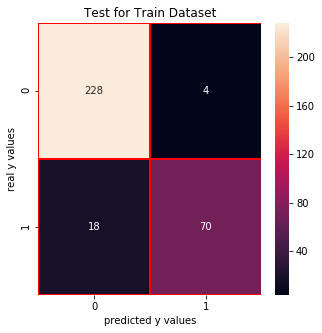

In [42]:
cm_svm_train = confusion_matrix(y_train_01,svm.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

Gaussian Naive Bayes:
Confusion Matrix:

For Actual 1: 29

Predicted 1: 28
Predicted 0: 1
For Actual 0: 51

Predicted 1: 2
Predicted 0: 49

score:  0.9625
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


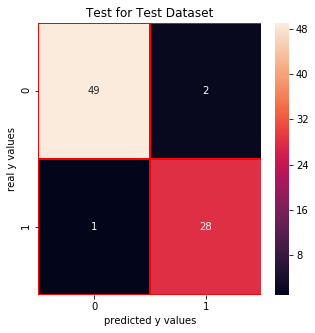

precision_score:  0.933333333333
recall_score:  0.965517241379
f1_score:  0.949152542373


In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train_01)
print("score: ", nb.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(nb.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(nb.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01,nb.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,nb.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,nb.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,nb.predict(x_test)))

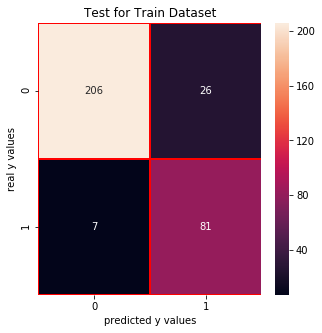

In [45]:
cm_nb_train = confusion_matrix(y_train_01,nb.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### Decision Tree Classification:
Confusion Matrix:

For Actual 1: 29

Predicted 1: 26
Predicted 0: 3
For Actual 0: 51

Predicted 1: 1
Predicted 0: 50

score:  0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


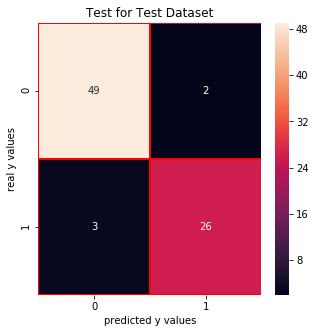

precision_score:  0.928571428571
recall_score:  0.896551724138
f1_score:  0.912280701754


In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_01)
print("score: ", dtc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01,dtc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,dtc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,dtc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,dtc.predict(x_test)))

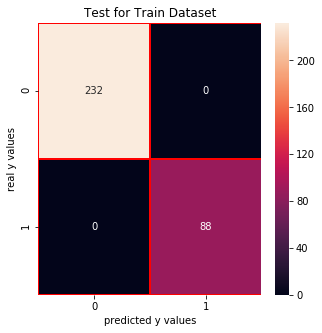

In [47]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### Random Forest Classification:

Confusion Matrix:

For Actual 1: 29

Predicted 1: 25
Predicted 0: 4
For Actual 0: 51

Predicted 1: 1
Predicted 0: 50

score:  0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


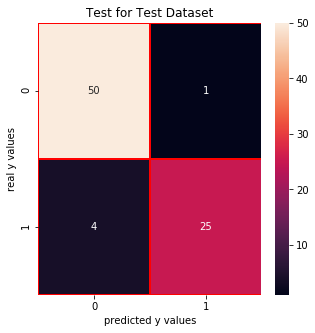

precision_score:  0.961538461538
recall_score:  0.862068965517
f1_score:  0.909090909091


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(x_train,y_train_01)
print("score: ", rfc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01,rfc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,rfc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,rfc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,rfc.predict(x_test)))

### Test for Train Dataset:

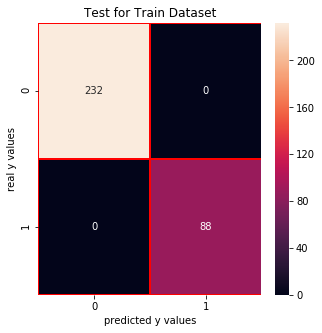

In [50]:
cm_rfc_train = confusion_matrix(y_train_01,rfc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### K Nearest Neighbors Classification

Finding the k value:

As a result of the test, the best k value is 3.
Confusion Matrix:

For Actual 1: 29

Predicted 1: 26
Predicted 0: 3
For Actual 0: 51

Predicted 1: 2
Predicted 0: 49

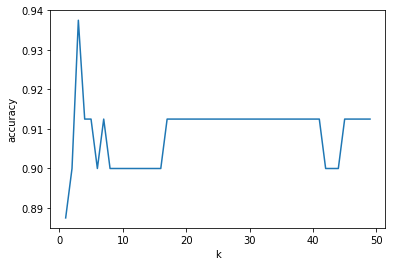

score of 3 : 0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


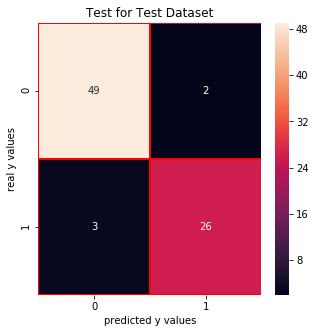

precision_score:  0.928571428571
recall_score:  0.896551724138
f1_score:  0.912280701754


In [51]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train_01)
    scores.append(knn_n.score(x_test,y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train_01)
print("score of 3 :",knn.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(knn.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(knn.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01,knn.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,knn.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,knn.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,knn.predict(x_test)))


### Test for Train Dataset:

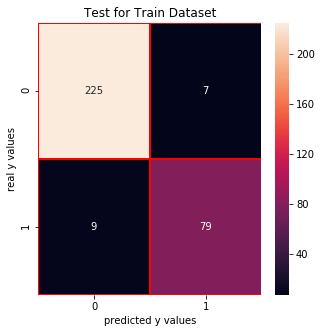

In [52]:
cm_knn_train = confusion_matrix(y_train_01,knn.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### Comparison of Classification Algorithms

All classification algorithms achieved around 90% success. The most successful one is Gaussian Naive Bayes with 96% score. I am aware that these are unusually high scores, suggesting bias in the models.

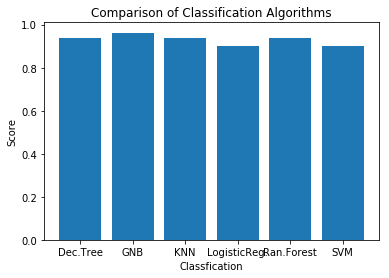

In [53]:
y = np.array([lrc.score(x_test,y_test_01),svm.score(x_test,y_test_01),nb.score(x_test,y_test_01),dtc.score(x_test,y_test_01),rfc.score(x_test,y_test_01),knn.score(x_test,y_test_01)])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
x = ["LogisticReg.","SVM","GNB","Dec.Tree","Ran.Forest","KNN"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()

### Clustering Algorithms (Unsupervised Machine Learning Algorithms)

Preparing Data for Clustering

In [55]:
df = pd.read_csv("Admission_Predict.csv", sep = ",")
df=df.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})
serial = df["Serial No."]
df.drop(["Serial No."],axis=1,inplace = True)
df = (df- np.min(df))/(np.max(df)-np.min(df))
y = df.ChanceOfAdmit 
x = df.drop(["ChanceOfAdmit"],axis=1)

### Principal Component Analysis
* All features (x) were collected in one feature with Principal Component Analysis.

In [56]:
# for data visualization
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, whiten= True )  # whitten = normalize
pca.fit(x)
x_pca = pca.transform(x)
x_pca = x_pca.reshape(400,)
dictionary = {"x":x_pca,"y":y}
data = pd.DataFrame(dictionary)
print("data:")
print(data.head())
print("\ndf:")
print(df.head())

data:
          x         y
0 -1.377553  0.920635
1 -0.919033  0.666667
2 -0.320986  0.603175
3 -0.520960  0.730159
4  1.137743  0.492063

df:
   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  
0       1.0       0.920635  
1       1.0       0.666667  
2       1.0       0.603175  
3       1.0       0.730159  
4       0.0       0.492063  


### K-means Clustering
The elbow method is used to determine the best number of clusters for k-means clustering. The number of clusters used in this case is 3.

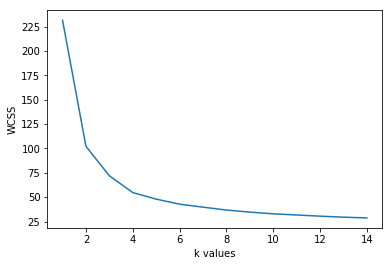

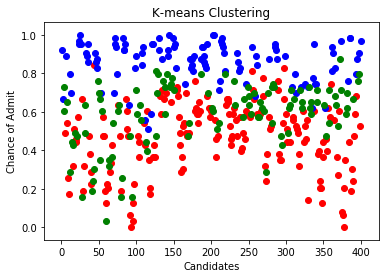

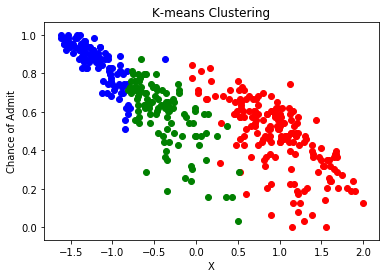

In [57]:
df["Serial No."] = serial
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(x)

df["label_kmeans"] = clusters_knn


plt.scatter(df[df.label_kmeans == 0 ]["Serial No."],df[df.label_kmeans == 0].ChanceOfAdmit,color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["Serial No."],df[df.label_kmeans == 1].ChanceOfAdmit,color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["Serial No."],df[df.label_kmeans == 2].ChanceOfAdmit,color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

df["label_kmeans"] = clusters_knn
plt.scatter(data.x[df.label_kmeans == 0 ],data[df.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[df.label_kmeans == 1 ],data[df.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[df.label_kmeans == 2 ],data[df.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()


### Hierarchical Clustering

The dendrogram method is used to determine the best number of clusters for hierarchical clustering. The number is 3 again.

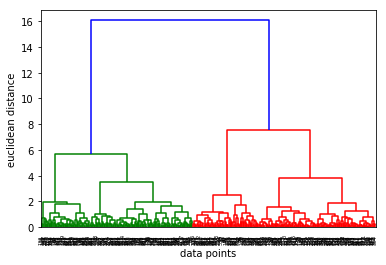

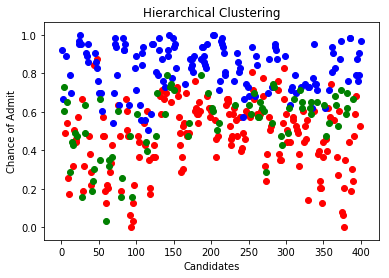

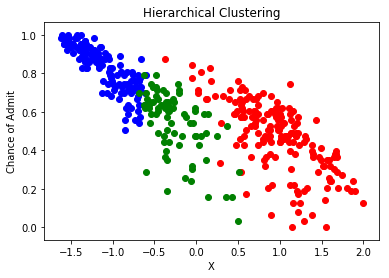

In [58]:
df["Serial No."] = serial

from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(x,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
clusters_hiyerartical = hiyerartical_cluster.fit_predict(x)

df["label_hiyerartical"] = clusters_hiyerartical

plt.scatter(df[df.label_hiyerartical == 0 ]["Serial No."],df[df.label_hiyerartical == 0].ChanceOfAdmit,color = "red")
plt.scatter(df[df.label_hiyerartical == 1 ]["Serial No."],df[df.label_hiyerartical == 1].ChanceOfAdmit,color = "blue")
plt.scatter(df[df.label_hiyerartical == 2 ]["Serial No."],df[df.label_hiyerartical == 2].ChanceOfAdmit,color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

plt.scatter(data[df.label_hiyerartical == 0 ].x,data.y[df.label_hiyerartical == 0],color = "red")
plt.scatter(data[df.label_hiyerartical == 1 ].x,data.y[df.label_hiyerartical == 1],color = "blue")
plt.scatter(data[df.label_hiyerartical == 2 ].x,data.y[df.label_hiyerartical == 2],color = "green")
plt.title("Hierarchical Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

In [59]:
print(df.head())

   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  ChanceOfAdmit  Serial No.  label_kmeans  label_hiyerartical  
0       1.0       0.920635           1             1                   1  
1       1.0       0.666667           2             1                   1  
2       1.0       0.603175           3             2                   2  
3       1.0       0.730159           4             2                   2  
4       0.0       0.492063           5             0                   0  


### Comparison of Clustering Algorithms
K-means Clustering  and Hierarchical Clustering are similarly *done*.

## Three Important Features
### Correlation between All Columns
### • The 3 most important features for admission to the Master: CGPA, GRE Score, and TOEFL Score
### • The 3 least important features for admission to the Master: Research, LOR, and SOP    

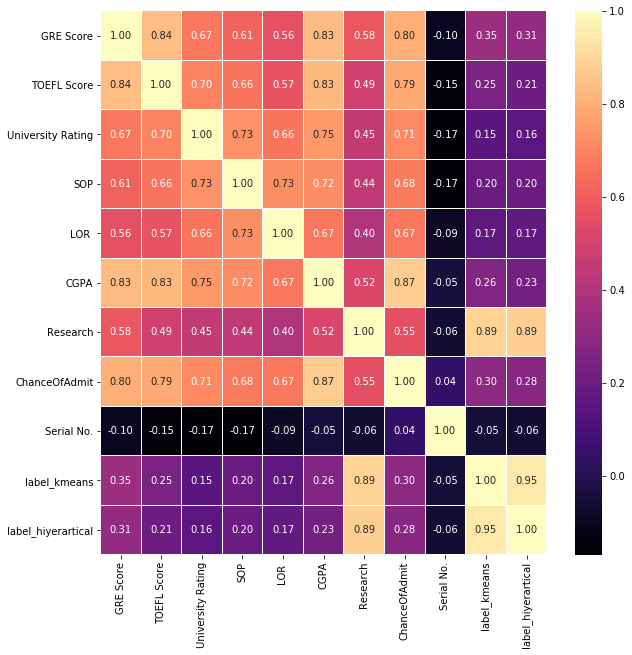

In [60]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### The Three Features for Linear Regression
#### • The first results for Linear Regression (7 features): r_square score: 0.821208259148699
#### • The results for Linear Regression now (3 features): r_square score: 0.8212241793299223
#### • The two results are very close. If these 3 features (CGPA, GRE SCORE, and TOEFL SCORE) are used instead of all 7 features together, the result is not bad and performance is increased because less calculation is required.

In [62]:
df = pd.read_csv("Admission_Predict.csv",sep = ",")
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
newDF = pd.DataFrame()
newDF["GRE Score"] = df["GRE Score"]
newDF["TOEFL Score"] = df["TOEFL Score"]
newDF["CGPA"] = df["CGPA"]
newDF["Chance of Admit"] = df["Chance of Admit"]

y_new = df["Chance of Admit"].values
x_new = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train_new, x_test_new,y_train_new, y_test_new = train_test_split(x_new,y_new,test_size = 0.20,random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(x_train_new,y_train_new)
y_head_lr_new = lr_new.predict(x_test_new)

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test_new,y_head_lr_new))

r_square score:  0.82122417933


- Since I am applying for a data analyst position, I used the first few cells to analyze some graphs to show basic relationships between the data, before showing machine learning models. 


- Some ways I could have improved my models and my R-Squared scores could have been by using Ridge or Lasso regressions. I would implement these methods because they allow a person to regularize ("shrink") their coefficients, which would mean that the datasets would be better optimized for prediction. It would also allow me to use complex models without having results that are overfitted. Because of my abnormally high scores in my R-Squared models (some of them were high 90s), I feel that this could have given me better results.


- Otherwise, I could benefit from having more features, since real world datasets generally aren't clean or structured into continuous variables like the dataset I worked with. 